## Álvaro Sánchez de la Cruz, Marc Gil Arnau
# Tarea 1
# Ánalisis Exploratorio y Redes Neuronales Artificiales

Índice (pendiente por hacer, a medida que vayamos haciendo cosas las vamos metiendo)

## Sección I. Análisis descriptivo y exploratorio de la base de datos. Preprocesamiento

## 1.- Cargar y leer la base datos

In [1]:
# Bibliotecas utilizadas en esta primera sección
import pandas as pd
import numpy as np
import seaborn as sns    

import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Leermos y guardamos el fichero en un dataframe.
comercio_df = pd.read_csv("Dataset.csv")

comercio_df = comercio_df.drop("ID", axis = 1)
comercio_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


## 2.- Descripción del conjunto "E-Commerce Shipping"

Contexto: Una compañía internacional basada en vender productos electrónicos a través de internet quiere estudiar el comportamiento de sus clientes en base a ciertos datos de ventas.
El objetivo es ver si el envío ha llegado a tiempo o no. Se trata de una tarea de clasificación.

Variables:
* ID: Número identificador del cliente.
* Warehouse Block: La compañía tiene 5 grandes almacenes (A, B, C, D, E).
* Mode of shipment: La comapñía tiene 3 formas de entregar los productos (Ship, Flight, Road).
* Customer care calls: Número de llamadas que hace el cliente a la compañía para preguntar sobre el estado del envío.
* Customer rating: Calificación del cliente sobre la compañía. 1 es lo peor, 5 es lo mejor.
* Cost of the products: Precio del producto en dólares americanos.
* Prior purchases: Número de compras realizadas por el cliente previamente.
* Product importance: La compañía ha caracterizado la importancia de cada producto (low, medium, high).
* Gender: Género del cliente (Male, Female).
* Discount offered: Descuento ofrecido en el producto en porcentaje.
* Weight in gms: Peso del producto en gramos.
* Reached on time: Es la variable objetivo, 1 indica que el producto NO ha llegado a tiempo y 0 que sí lo ha hecho.


In [3]:
# Tipo de las variables (numérica, categórica, etc...)
comercio_df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [4]:
# Nombres de las variables
comercio_df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 3.- Análisis descriptivo

In [5]:
# Vistazo rápido a los estadísticos de las variables
comercio_df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
# Tamaño de la base de datos (número de observaciones, número de muestras)
comercio_df.shape

(10999, 11)

In [7]:
# Número de valores únicos por variable
comercio_df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

Viendo los resultados de .describe() y estos, podemos ver que no hay clientes que hayan llamado 0 ó 1 veces para informarse sobre su pedido así como también que los clientes estudiados tienen como mínimo 2 compras previas. Lo mismo a la compañía sólo le interesa el estudio de sus clientes "fieles".

In [8]:
# ¿Existen valores faltantes?
comercio_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

A priori no hay valores faltantes aunque puede que estemos ante el caso de que los valores faltantes hayan sido sustituidos por 0.

In [9]:
# ¿Está balanceada la variable objetivo?
comercio_df["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

La categorías no están perfectamente equilibradas pero tampoco podemos considerar un grave desbalanceo.

## 4.- Correlación
(hay que estudiar las correlaciones segun el tipo de variable, relacion numerica-numerica categorica-categorica ordinal-ordinal y todas las combinaciones posibles entre estas)

In [10]:
#comercio_df.corr(method='pearson', numeric_only=True)   
comercio_df.corr(method='spearman', numeric_only=True)  
#comercio_df.corr(method='kendall', numeric_only=True)   


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.011862,0.293700,0.272992,-0.104223,-0.232936,-0.064283
Customer_rating,0.011862,1.000000,0.010242,0.010537,-0.002299,-0.004803,0.013108
Cost_of_the_Product,0.293700,0.010242,1.000000,0.194216,-0.115817,-0.131980,-0.071850
Prior_purchases,0.272992,0.010537,0.194216,1.000000,-0.093872,-0.234673,-0.074643
Discount_offered,-0.104223,-0.002299,-0.115817,-0.093872,1.000000,-0.315677,0.335108
Weight_in_gms,-0.232936,-0.004803,-0.131980,-0.234673,-0.315677,1.000000,-0.265958
Reached.on.Time_Y.N,-0.064283,0.013108,-0.071850,-0.074643,0.335108,-0.265958,1.000000


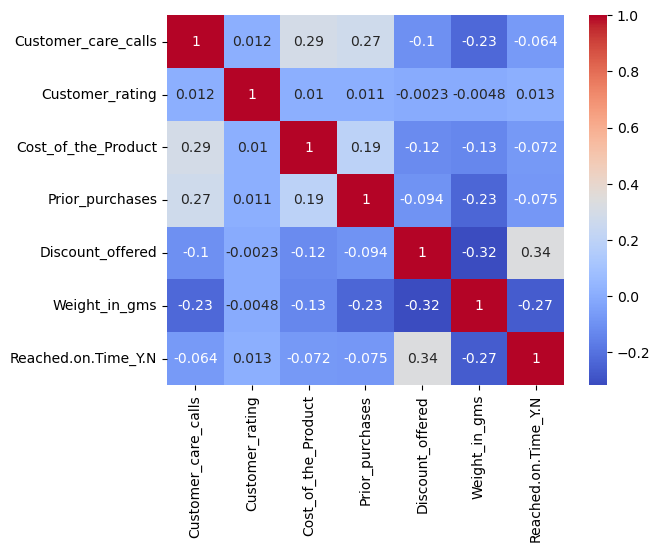

In [11]:
# Matriz de correlación
#corr_matrix = comercio_df.corr(method='pearson', numeric_only=True)
corr_matrix = comercio_df.corr(method='spearman', numeric_only=True)
#corr_matrix = comercio_df.corr(method='kendall', numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 5.- One-Hot Encoding

En nuestro dataset hay algunas variables categóricas (gender, warehouse block, mode of shiphment y product importance). Para poder usarlas en los modelos que utilizaremos, necesitamos transformarlas a numérico.

En el caso de Gender, al ser una variable con solo dos categorías podemos convertirla en una variable binaria sin necesidad de usar del One-Hot Encoding.

In [12]:
comercio_copia = comercio_df.copy()

In [13]:
mapear_gender = {"M": 1, "F": 0}
comercio_copia["Gender"] = comercio_copia["Gender"].map(mapear_gender).astype("Int64")

Para las tres variables restantes aplicaremos One-Hot Encoding para convertirlas a formato numérico.

In [14]:
# One Hot Encoding, ponemos la opción drop_first = True ya que las columnas credas con el encoding son linelmte dependientes 
# por lo que podemos tener problemas de multicolineadlida. Entonces eliminamos una columna que es deducible por el resto
warehouse_encoded = pd.get_dummies(comercio_copia["Warehouse_block"], drop_first = True, dtype = int)
mode_shipment_encoded = pd.get_dummies(comercio_copia["Mode_of_Shipment"], drop_first = True, dtype = int)
product_importance_encode = pd.get_dummies(comercio_copia["Product_importance"], drop_first = True, dtype = int)


# Añadimos las variables y eliminamos las originales para evitar problemsa de duplicados
comercio_copia = pd.concat([comercio_copia.drop(columns=["Warehouse_block"]), warehouse_encoded], axis = 1)
comercio_copia = pd.concat([comercio_copia.drop(columns=["Mode_of_Shipment"]), mode_shipment_encoded], axis = 1)
comercio_copia = pd.concat([comercio_copia.drop(columns=["Product_importance"]), product_importance_encode], axis = 1)

In [15]:
comercio_copia.shape
comercio_copia

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,B,C,D,F,Road,Ship,low,medium
0,4,2,177,3,0,44,1233,1,0,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,1,0,0,1,0
2,2,2,183,4,1,48,3374,1,0,0,0,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,1,0,0,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,0,1,1538,1,0,0,0,0,0,1,0,1
10995,4,1,232,5,0,6,1247,0,1,0,0,0,0,1,0,1
10996,5,4,242,5,0,4,1155,0,0,1,0,0,0,1,1,0
10997,5,2,223,6,1,2,1210,0,0,0,0,1,0,1,0,1


### Preprocesamiento

Vamos a dividir de forma estratificada el dataset en proporciones del 70% para diseño y 30% para test.

In [16]:
# Dividimos las variables en variable dependiente o variable independiente
X = comercio_copia.drop("Reached.on.Time_Y.N", axis = 1)
y = comercio_copia["Reached.on.Time_Y.N"]

In [17]:
# Separamos el conjunto de diseño (X_train, y_train) y de test (X_test, y_test) de forma estratificada: particiones 70/30
X_diseno, X_test, y_diseno, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
print(X_diseno.shape)
print(y_diseno.shape)
print(X_test.shape)
print(y_test.shape)

(7699, 15)
(7699,)
(3300, 15)
(3300,)


### Normalización de variables

En el EDA hemos visto que las variables tenian valores dispares, esto puede afectar a los resultados de los modelos. Para solucionarlo vamos a escalar las variables para que tengan media 0 y desviación 1.

In [18]:
# Escogemos las columnas númericas
num_col = X_diseno.select_dtypes(include=["int64"]).columns.tolist()

# Creamos y ajustamos el scaler
scaler = StandardScaler()
scaler.fit(X_diseno[num_col])

# Transformamos y asginamos los nuevos valores
X_diseno[num_col] = scaler.transform(X_diseno[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

## Sección II. Esquema lineal y selección de características

En esta sección entrenaremos un modelo de regresión logística para predecir si un envío llega a tiempo o no.

Comenzaremos ajustando una regresión logística básica sin regularización.

In [19]:
# Creamos el modelo y lo entrenamos con el conjunto de diseño
logreg = LogisticRegression(random_state = 0, max_iter = 500)
logreg.fit(X_diseno, y_diseno)
# hacemos predicciones sobre test
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],    columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
cm_df

Accuracy: 0.6463636363636364

Classification report:n
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1331
           1       0.71      0.69      0.70      1969

    accuracy                           0.65      3300
   macro avg       0.63      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



,Pred 0 (Llegó a tiempo),Pred 1 (No llegó a tiempo)
Real 0 (Llegó a tiempo),784,547
Real 1 (No llegó a tiempo),620,1349


La regresión logística básica tiene un rendimiento moderado, con un accuracy del 65%. El modelo distingue basatante bien los envíos que no llegan a tiempo con un recall de casi el 70%, pero tiene limitaciones a la hora de identificar entregas que han llegado a tiempo con un recall del 59%.  

Los resultados son los esperados para un modelo sin regularización o selección de características, pero nos servirá para comparar con modelos más complejos.

In [20]:
# Encontramos los coeficientes más importantes para el modelo
coef = logreg.coef_[0]
feature_names = X_diseno.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coef,
    'AbsCoef': np.abs(coef)
})

coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)
print("\nCoeficientes ordenados por importancia:\n")
coef_df


Coeficientes ordenados por importancia:



,Feature,Coeficiente,AbsCoef
5,Discount_offered,1.759061,1.759061
6,Weight_in_gms,-0.396350,0.396350
13,low,-0.142304,0.142304
3,Prior_purchases,-0.138911,0.138911
0,Customer_care_calls,-0.129430,0.129430
14,medium,-0.123931,0.123931
2,Cost_of_the_Product,-0.105185,0.105185
1,Customer_rating,0.062096,0.062096
4,Gender,0.030721,0.030721
11,Road,-0.014063,0.014063


Si observamos los coeficientes, el que mayor impacto tiene en el retraso de un envio (clase 1) es el descuento que tiene un coeficiente muy superior al resto de características. Las variables que reducen el riesgo a un retraso del envío son el peso, las compras previas o si la importancia del producto es baja. Se puede ver casi todas las variables favorecen que el envío no se haga con retraso. 
También se puede comentar que el tipo de envñio o el almacen donde se guarda el producto no tienen un papael importante en la explciación de retrasos

## Regresión logística con regularización

## Comentarios que nos hacen

Quitar ID
Particiones estradtificadas
Usar one-hot encoding para codificar las variables
Dividir el dataset en male y female, hacer el eda para cada uno y el modelo para cada uno